## Exploring Seattle AirBnb Data

This notebook is created as part of the Udacity Data Science Nanodegree program.

After looking at the prices of each listing, I was interested which factors have the most influence on the price of a room and if we can create a model to predict the price of a room. 

### Data Understanding 
We will first load in the different packages and get an overview what is in the datasets


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



%matplotlib inline

calendar = pd.read_csv("/Users/anniek/Documents/Data Science Nano Degree/Blogpost Airbnb/calendar.csv")
listings = pd.read_csv("/Users/anniek/Documents/Data Science Nano Degree/Blogpost Airbnb/listings.csv")
reviews = pd.read_csv("/Users/anniek/Documents/Data Science Nano Degree/Blogpost Airbnb/reviews.csv")

In [2]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
calendar.describe

<bound method NDFrame.describe of          listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]>

In [7]:
listings.describe

<bound method NDFrame.describe of             id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Styli

After looking at all the datasets, I concluded to continue only with listings data set since we are interested in the price of a room.

### Data Preperation
Now we will look if the price column contains any NA values.

In [8]:
listings['price'].isnull().sort_values()

0       False
2537    False
2538    False
2539    False
2540    False
        ...  
1278    False
1279    False
1280    False
1268    False
3817    False
Name: price, Length: 3818, dtype: bool

In [9]:
num_rows = listings.shape[0] 
num_cols = listings.shape[1]
print(num_rows, num_cols)

3818 92


Luckily for me, it didn't. So we can use all the data (3818 rows) and don't need to remove any rows out of the dataset.

In [10]:
listings['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

We can see that the price column contains a dollar sign, so we need to convert the type of this column to a float in order to be able to use it.

In [11]:
def price_to_float(df):
    """Return nothing and changes a string to a float by removing the dollar sign.
    
    Args:
        df (dataframe): Pandas dataframe.
    """
    # Remove '$' and ','
    dollar_cols = ['price', 'weekly_price', 'monthly_price', 'extra_people', 'security_deposit', 'cleaning_fee']
    for dollar_col in dollar_cols:
        df[dollar_col] = df[dollar_col].replace('[\$,]', '', regex=True).astype(float)


In [12]:
price_to_float(listings)
listings.loc[:4, ['id', 'price']]

,id,price
0,241032,85.0
1,953595,150.0
2,3308979,975.0
3,7421966,100.0
4,278830,450.0


We can see that some columns represent a percentage, so we need to convert the type of this column to a float and recomove the percentage sign in order to be able to use it.

In [13]:
def percentage_to_float(df):
    """Return nothing and changes a string to a float by removing the percentage.
    
    Args:
        df (dataframe): Pandas dataframe.
    """
    # Remove '%' and ','
    perc_cols = ['host_response_rate', 'host_acceptance_rate']
    for perc_col in perc_cols:
        df[perc_col] = df[perc_col].replace('[\%,]', '', regex=True).astype(float)


In [14]:
percentage_to_float(listings)
listings.loc[:4, ['id', 'host_response_rate']]

,id,host_response_rate
0,241032,96.0
1,953595,98.0
2,3308979,67.0
3,7421966,NaN
4,278830,100.0


In order to be able to work with the data, the missing values of the numeric values are filled with the mean and dummy variables are created for the categorical columns. Also, a lot of columns that are not helpful for the analysis will be dropped, like a url link or comments from customers.

In [15]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    '''
    
    # Drop rows with missing price values
    # df = df.dropna(subset=['price'], axis=0)
    y = df[['id', 'price']]
    
    #Drop columns that doest not make sense to use as factor in linear model
    df = df.drop(['weekly_price', 'monthly_price', 'listing_url', 'last_scraped', 'name', 'summary', 'space', 
    'description','neighborhood_overview', 'notes',
    'transit', 'thumbnail_url', 'medium_url', 'picture_url',
    'xl_picture_url', 'host_url', 'host_name', 'host_since',
    'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications',
    'street', 'license', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'amenities', 'calendar_updated', 'zipcode',
    'calendar_last_scraped', 'first_review', 'last_review'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df    
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listings) 

In [16]:
df = pd.merge(y, X, on='id')

In [17]:
df = df.drop(['price_y'], axis=1)
df = df.rename(columns={'price_x': 'price'})

In [18]:
df.shape

(3818, 81)

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
df

,id,price,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Phinney Ridge Seattle,city_Seattle,city_Seattle,city_West Seattle,city_seattle,city_西雅图,state_wa,"smart_location_Phinney Ridge Seattle, WA","smart_location_Seattle , WA","smart_location_Seattle, WA","smart_location_West Seattle, WA","smart_location_seattle, wa","smart_location_西雅图, WA",is_location_exact_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,241032,85.0,20160104002432,956883,96.000000,100.000000,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,854.618557,287.610397,61.710904,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,953595,150.0,20160104002432,5177328,98.000000,100.000000,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,854.618557,100.000000,40.000000,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
2,3308979,975.0,20160104002432,16708587,67.000000,100.000000,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,854.618557,1000.000000,300.000000,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,7421966,100.0,20160104002432,9851441,94.886798,99.967159,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,854.618557,287.610397,61.710904,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,278830,450.0,20160104002432,1452570,100.000000,99.967159,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,854.618557,700.000000,125.000000,6,15.0,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0.890000,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,359.0,20160104002432,31148752,99.000000,100.000000,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,3.0,854.618557,287.610397,230.000000,1,0.0,3,1125,18,32,32,32,1,80.000000,8.000000,10.000000,4.000000,8.000000,10.000000,8.000000,8,0.300000,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3814,8902327,79.0,2016010

### Data Modeling & Evaluation
Now the data is ready to get insights from, we can start modeling the data.
A histogram of the price will be created to get to know how the price of a room is distributed.

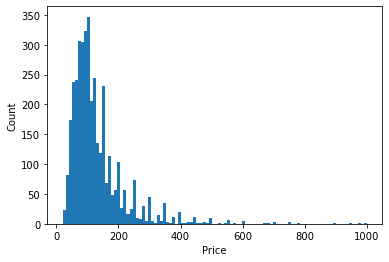

In [21]:
def histogram(dataframe, column, bins=100):
    """Return nothing and shows a histogram.
    
    Args:
        df (dataframe): Pandas dataframe.
        column (str): The name of column.
        bins (int): The number of bins of the histogram (default=100).
    """
    x = column
    plt.hist(x, bins = bins)
    
    #plt.xticks(range(500))
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()
    
histogram(df, df['price'])

In [22]:
stats.mode(df['price'])

ModeResult(mode=array([150.]), count=array([162]))

The graph shows a right skewed distribution, where most people sell their room for 150 dollar a night. In order to not get a really big correlation matrix, I only selected the features with a higher correlation than 0.1 or a lower correlation than -0.1. 

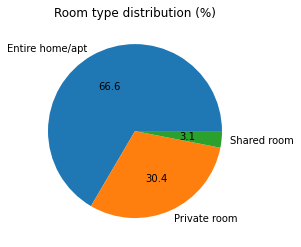

In [132]:
def piechart(dataframe, column):
    """Return nothing and shows a pie chart
    
    Args:
        df (dataframe): Pandas dataframe.
        column (str): The name of column.
    """
    dataframe.groupby(column).size().plot(kind='pie', autopct='%.1f')
    plt.title('Room type distribution (%)')
    plt.ylabel('')
    
piechart(listings, 'room_type')

[Text(0.5, 0, 'Number of listings'), Text(0, 0.5, 'Property type')]

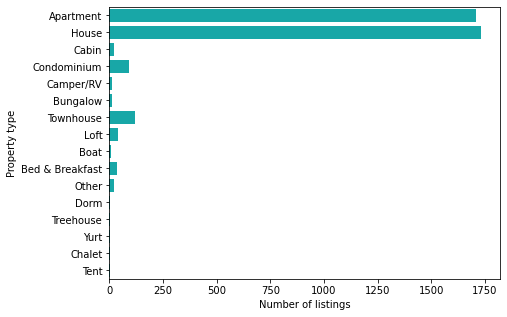

In [109]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="property_type", data=listings, color="c")
ax.set(xlabel="Number of listings", ylabel = "Property type")
#sns.catplot(x="property_type", kind="count", data=listings)

In [73]:
def clean_corr(df, target, threshold):
    """Return df.corr() that greater or equal than threshold.
    
    Args:
        df (dataframe): Pandas dataframe.
        target (str): The name of target.
        threshold (float): The miniumu required correlation coefficient.
        
    Returns:
        df.corr()
    """
    df = df.drop(['scrape_id'], axis=1)
    df = df.corr().copy()
    
    
    for col in df.columns:
        if abs(df.loc[col, target]) < threshold:
            df.drop(col, axis=0, inplace=True)
            df.drop(col, axis=1, inplace=True)
    return df

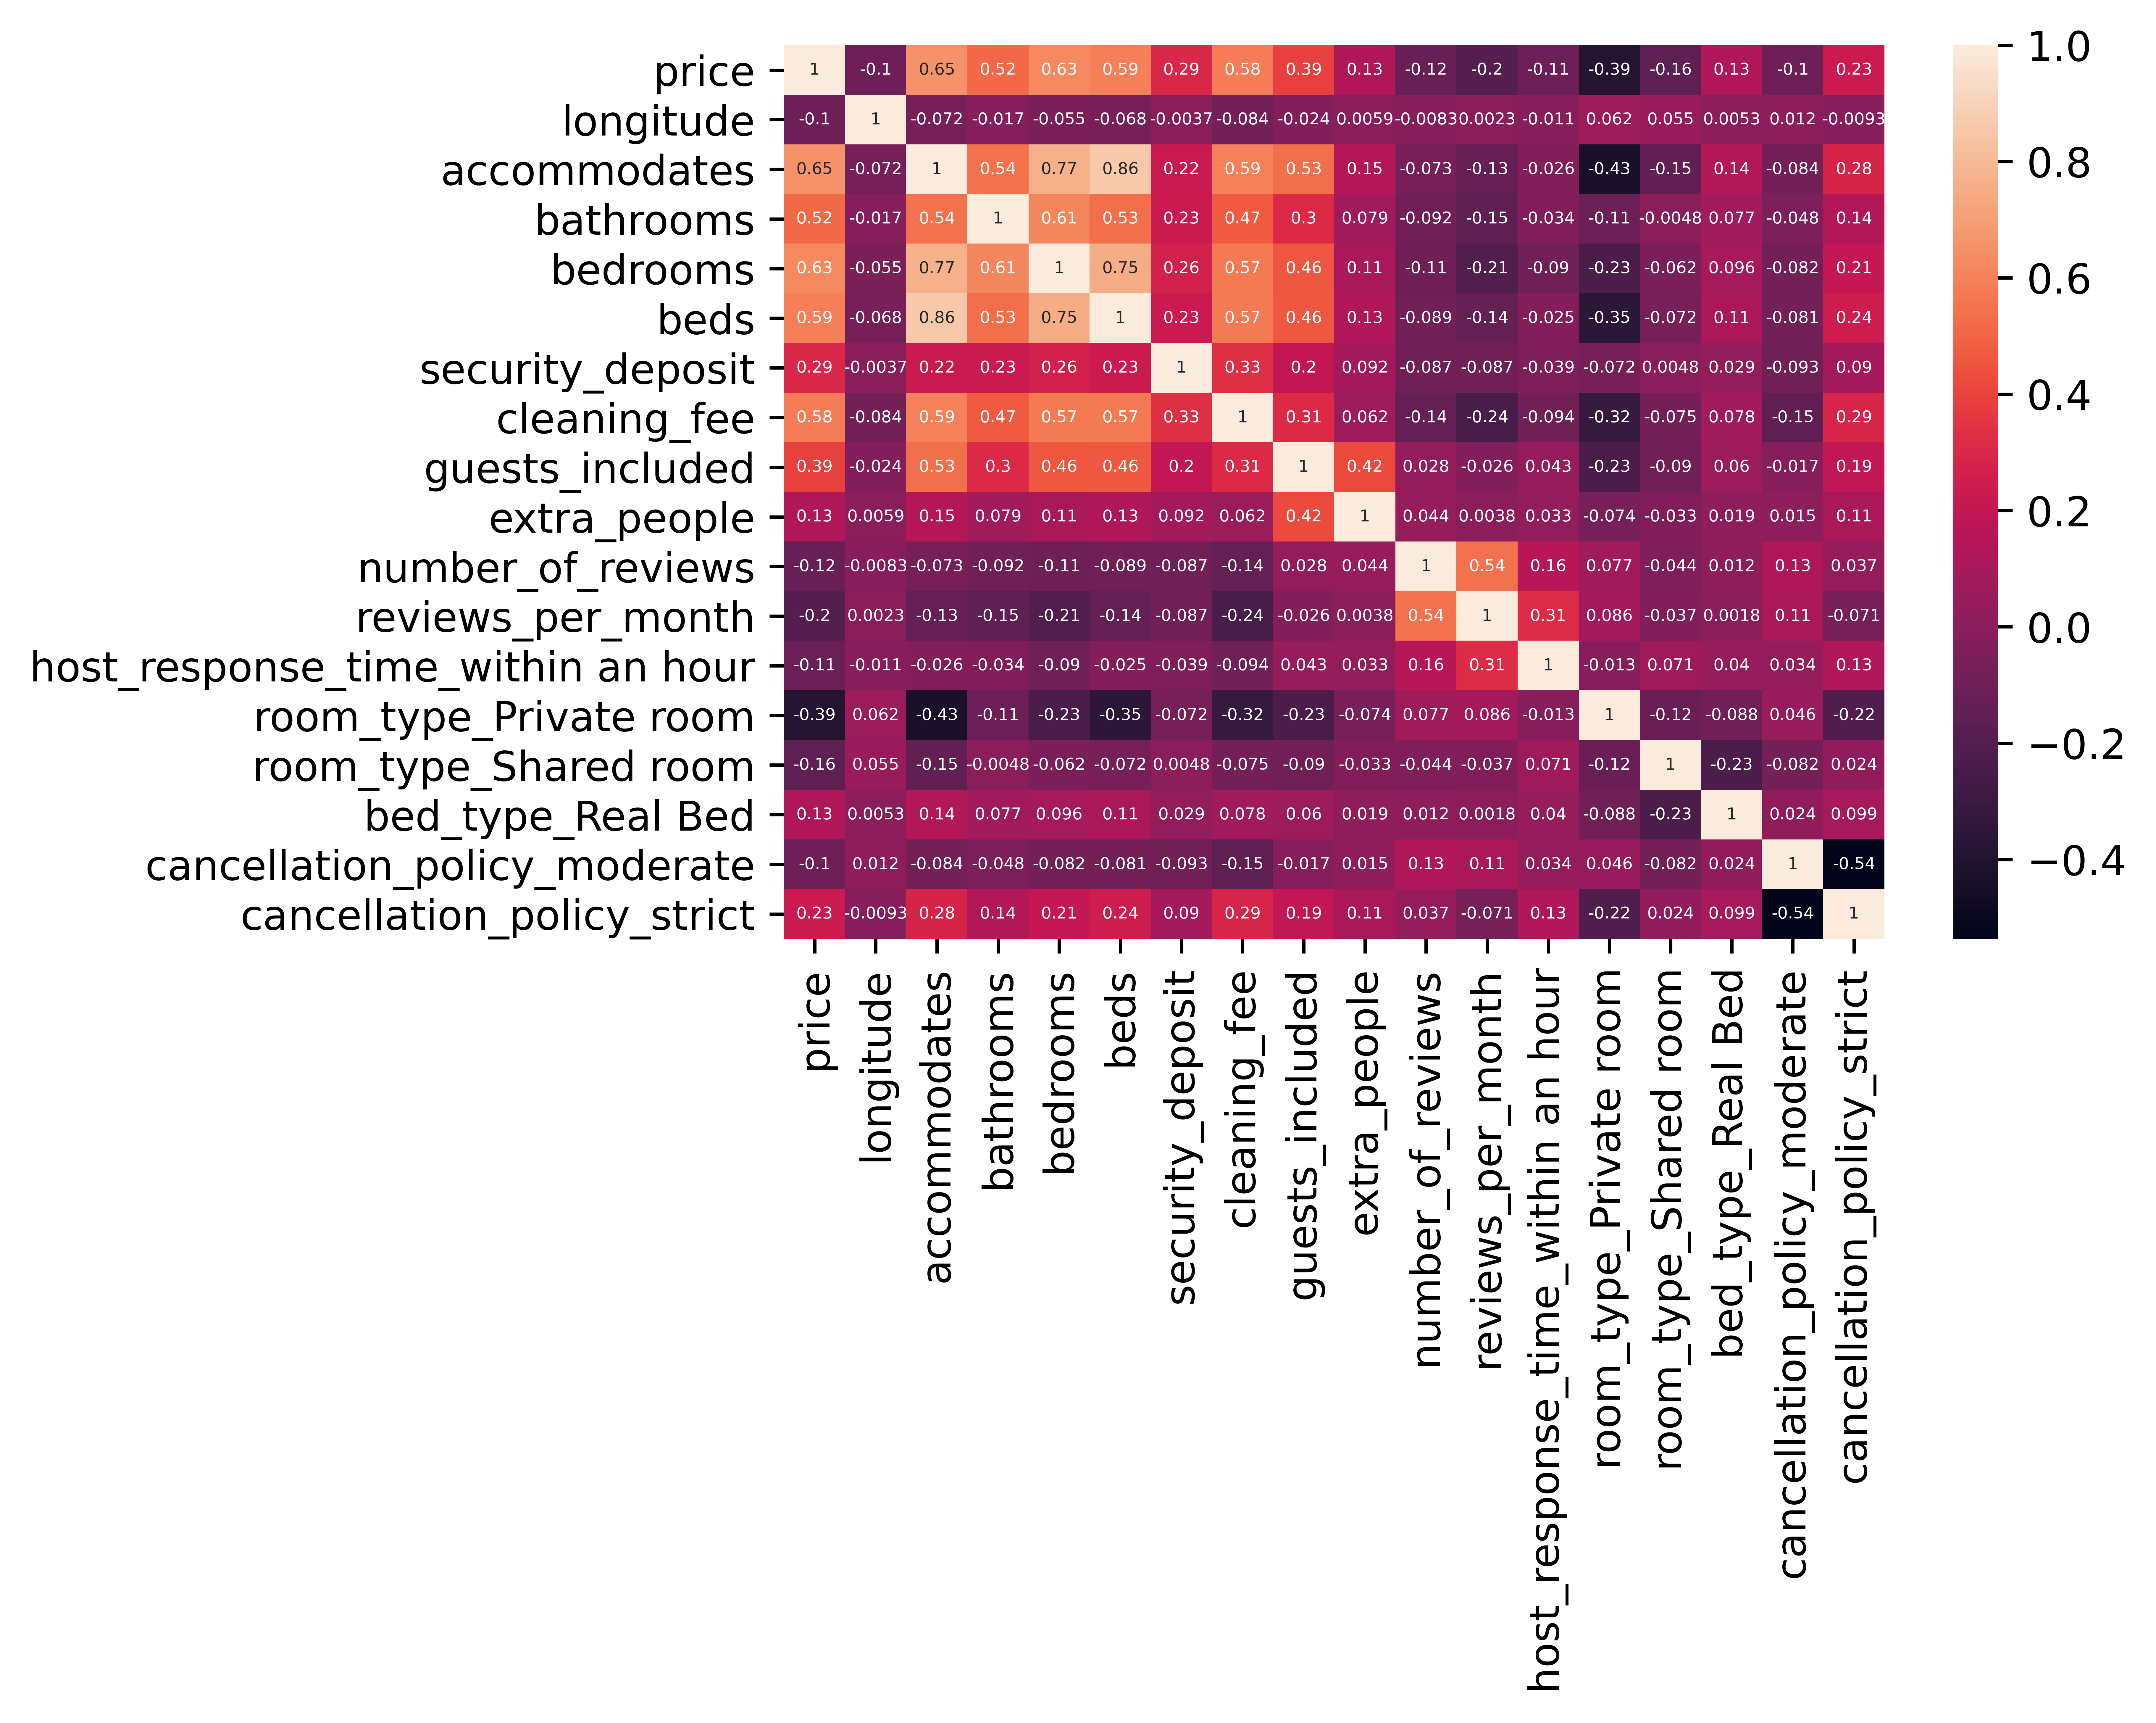

In [77]:
def plot_corr(data):
    """Return X_corr which are variables that have a greater value than the threshold.
    
    Args:
        df (dataframe): Pandas dataframe.
        
    Returns:
        X_corr
    """
    X_corr = clean_corr(data, 'price', 0.1)
    plt.figure(dpi=1000)
    sns.heatmap(X_corr, cmap="rocket", annot=True, annot_kws={"fontsize": 4});
    
    return X_corr

X_corr = plot_corr(df)

From the correlation matrix we can see that accommodates, bedrooms, beds, cleaning fee, bathrooms and guests included correlate a lot with the price of a room. We can also see that these factors correlate a lot with each other, which means that the factors have overlapping information for the model. Putting these factors together in a model will probably only overcomplicate the model. 

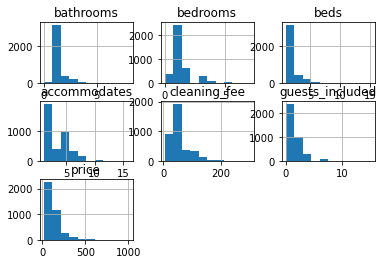

In [26]:
df[['bathrooms', 'bedrooms', 'beds', 'accommodates', 'cleaning_fee', 'guests_included', 'price']].hist();

To get a first impression, let's use all the factors with a higher correlation than 0.1 to which factors have the biggest influence on the prediction of the price of a room.

In [78]:
def create_lm(data, columns, target_variable):
    """Return X_train, lm_model which is a dataframe of the trained variables and the trained linear model.
    
    Args:
        df (dataframe): Pandas dataframe.
        columns (list): List of columns which need to be trained on.
        target_variable (str): The target variable which needs to be predicted.
        
    Returns:
        X_train, lm_model
    """
    #Only use quant variables and drop any rows with missing value
    df = data[columns]
    df_dropna = df.dropna(axis=0)

    #Split into explanatory and response variables
    X = df.iloc[: , 1:]

    y = df_dropna[target_variable]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))
    
    return X_train, lm_model

X_train, lm_model = create_lm(df, X_corr.columns, 'price')

The r-squared score for your model was 0.5761767796749482 on 1146 values.


In [55]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
0,longitude,-97.215053,97.215053
13,room_type_Shared room,-60.771005,60.771005
12,room_type_Private room,-36.598251,36.598251
2,bathrooms,26.952643,26.952643
3,bedrooms,18.674365,18.674365
11,host_response_time_within an hour,-11.306861,11.306861
1,accommodates,8.582891,8.582891
15,cancellation_policy_moderate,-5.656086,5.656086
14,bed_type_Real Bed,5.397622,5.397622
4,beds,-2.513589,2.513589


We can see from the coefficients that longitude, a shared or private room, the number of bathrooms and the number of bedrooms, have a lot of influence on the prediction of the price of a room. Since this many parameters in a linear model will probably cause overfitting, lets see if taking the top 5 parameters will change anything on the performance of the model (R-squared). 

In [60]:
columns = ['price', 'longitude', 'bathrooms', 'bedrooms', 'room_type_Private room', 'room_type_Shared room']

In [61]:
X_train, lm_model = create_lm(df, columns, 'price')

The r-squared score for your model was 0.5468637840975406 on 1146 values.


In [62]:
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
0,longitude,-126.368163,126.368163
4,room_type_Shared room,-81.948171,81.948171
3,room_type_Private room,-55.946577,55.946577
2,bedrooms,39.989648,39.989648
1,bathrooms,37.792984,37.792984


The R-squared got slightly lower, but the model will be more generalized if we have fewer parameters. Lets see if only taking the longitude parameter will change anything in the R-squared.

In [64]:
columns = ['price', 'longitude']

In [65]:
X_train, lm_model = create_lm(df, columns, 'price')

The r-squared score for your model was 0.013835214476772162 on 1146 values.


In [66]:
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
0,longitude,-255.376201,255.376201


As we can see only taking the longitude parameter as a predictor changed the R-squared rapidly in a negative way. 

## Summary of the analysis
It can be concluded that the price of a room in Seattle can be predicted with some certainty.

1) Most people sell their place for $150 a night.

2) Almost all places that are rented out are apartments and houses.

3) We can predict the price of a room with some certainty for 54.7% of the data. This means that we can predict the prices of a place pretty good for most of the cases.

4) The combination of the place of a room, the type of room (shared or private), the number of bedrooms and the number of bathrooms, predict the best price of a place.

5) The higher the number of accommodates, bedrooms and the cleaning fee, the more you can ask for a place.